## Homework14-0425
   **截止日期：**<font color=ff0000>**5.3(周二)晚** </font>
   <br>**注：**本次作业中附加题最多加1分。

## 1 时间序列分析基础
GDP.xls中提供了中国12年至今的分季度GDP，本次作业将在其基础上实现（只需任选其一）。

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [88]:
df=pd.read_excel('GDP.xls')
df.head()

,季度,统计时间,国内生产总值（亿元）,第一产业增加值（亿元）,第二产业增加值（亿元）,第三产业增加值（亿元）
0,1,2012第1季度,117357.6,6446.0,52316.2,58595.5
1,2,2012第2季度,131320.7,9911.3,61433.2,59976.1
2,3,2012第3季度,138089.6,14656.1,62256.2,61177.4
3,4,2012第4季度,151812.1,18071.2,68633.5,65107.2
4,5,2013第1季度,129449.6,6869.1,55861.2,66719.3


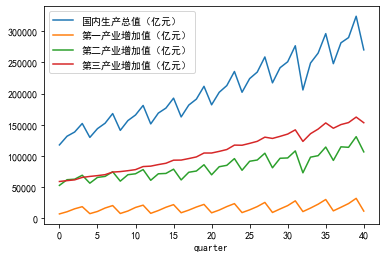

In [89]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df.iloc[:,2:6].plot()
plt.xlabel('quarter')
plt.show()

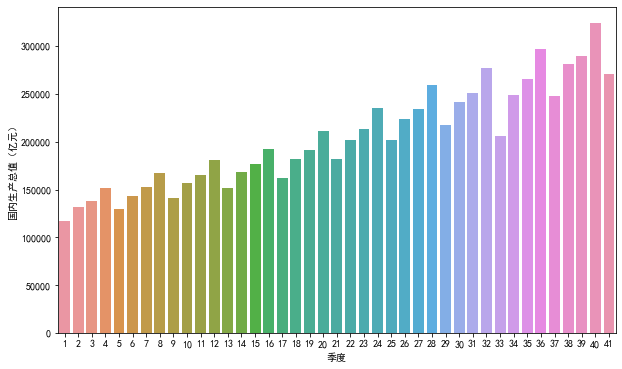

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x='季度',y='国内生产总值（亿元）',data=df)
plt.show()

### 1.1 自相关图与ADF计算（2分）
在以上的数据中任选其一完成下面的作业。使用plot_acf()绘制自相关系数图，并计算数据的ADF，判断其是否平稳（pvalue<0.05）。

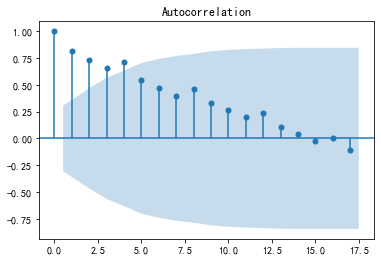

In [91]:
#TODO
# 选择国内生产总值
fig = plot_acf(x=df.iloc[:,2], alpha=0.05, fft=True, use_vlines=True)
plt.show()

In [92]:
result_nc = adfuller(x=df.iloc[:,2], regression='nc')
result_c = adfuller(x=df.iloc[:,2], regression='c')
result_ct = adfuller(x=df.iloc[:,2], regression='ct')
result_ctt = adfuller(x=df.iloc[:,2], regression='ctt')
print("nc: adf=", result_nc[0], " pvalue=", result_nc[1], " critical value=", result_nc[4]['5%'])
print("c: adf=", result_c[0], " pvalue=", result_c[1], " critical value=", result_c[4]['5%'])
print("ct: adf=", result_ct[0], " pvalue=", result_ct[1], " critical value=", result_ct[4]['5%'])
print("ctt: adf=", result_ctt[0], " pvalue=", result_ctt[1], " critical value=", result_ctt[4]['5%'])
print("由以上数据可知，仅仅引入常数和趋势回归得到的pvalue较大，并且adf>critical value，所以不能很好地平稳化序列")
print("引入线性和二次回归后，pvalue较小，且adf<critical value，有超过95%的置信度，平稳化效果较好")

nc: adf= 2.916191584434151  pvalue= 0.9997013356006053  critical value= -1.950388344478738
c: adf= 1.1589152149100506  pvalue= 0.9956893629595271  critical value= -2.9459512825788754
ct: adf= -1.7851474493643862  pvalue= 0.7118755992448869  critical value= -3.540390300068587
ctt: adf= -5.127091002064703  pvalue= 0.0006166446509455082  critical value= -4.0475053333333335
由以上数据可知，仅仅引入常数和趋势回归得到的pvalue较大，并且adf>critical value，所以不能很好地平稳化序列
引入线性和二次回归后，pvalue较小，且adf<critical value，有超过95%的置信度，平稳化效果较好


### 1.2 滑动窗口均值与标准差（2分）
选定一个滑动窗口大小（如2），在滑动窗口内计算均值与标准差，并绘制图像。

<AxesSubplot:>

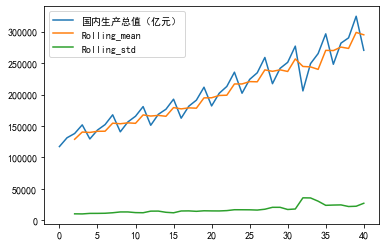

In [93]:
#TODO
# 窗口为3
df['Rolling_mean'] = df.iloc[:,2].rolling(window=3).mean()
df['Rolling_std'] = df.iloc[:,2].rolling(window=3).std()
df.iloc[:,[2, 6, 7]].plot()

### 1.3 成分分解（2分）
对序列进行加法或乘法成分分解，并绘制图像。具体可见https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

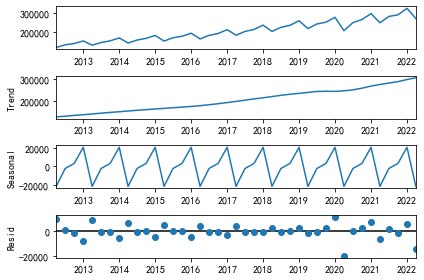

In [94]:
#TODO
# 加法分解
GDP = pd.DataFrame(df.iloc[:,2])
GDP.index = pd.date_range(start='2012/03/31', freq='QS', periods=41)
decompose = seasonal_decompose(x=GDP, model='additive', extrapolate_trend='freq')
decompose.plot()
plt.show()

### 1.4 平稳序列（2分）
对序列迭代地进行差分，直到得到一个平稳序列(p_value<0.05)，绘制最终得到的序列及其自相关图。有能力的同学可以尝试其他方法，可作为加分项。

Round  0 : adf= 1.1589152149100506  pvalue= 0.9956893629595271  critical value= -2.9459512825788754
Round  1 : adf= -2.7898638751338605  pvalue= 0.05973629194355309  critical value= -2.9459512825788754
Round  2 : adf= -2.1477868331242678  pvalue= 0.2257381968508072  critical value= -2.9719894897959187
Round  3 : adf= -4.680342649521682  pvalue= 9.160678959784647e-05  critical value= -2.9678817237279103


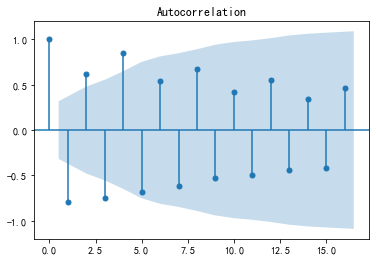

In [95]:
#TODO
data = df.iloc[:,2].values
result = adfuller(x=data, regression='c')
round = 0
print("Round ", round, ": adf=", result[0], " pvalue=", result[1], " critical value=", result[4]['5%'])
while (result[1]>=0.05):
    round += 1
    data = np.diff(data)
    result = adfuller(x=data, regression='c')
    print("Round ", round, ": adf=", result[0], " pvalue=", result[1], " critical value=", result[4]['5%'])
plot_acf(x=data)
plt.show()

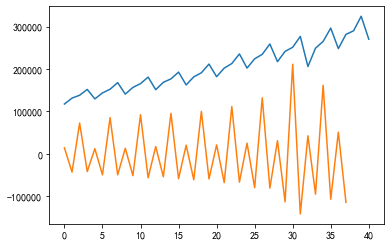

In [96]:
plt.plot(df.iloc[:,2])
plt.plot(data)

### 1.5 指数滑动平均(EMA)（2分）
与均值滑动平均(Equally Weighted Moving Average) 不同，窗口内的各权值按指数递减，距离越远，权值越小。  

EMA的计算公式为：
$ EMA_t =\left\{
\begin{matrix}
 \alpha y_t + (1-\alpha)EMA_{t-1},t>1\\
 y_1,t=1
\end{matrix}
\right.
$

其中，$\alpha \in (0,1)$表示权重的衰减程度，$\alpha$ 越大，当前抽样值的权重越高，滑动平均的实时性越强，相反，$\alpha$ 越小，平稳性更高。$\alpha$ 实际上控制权重计算中有效项的个数，即指数平滑有效窗口的大小。

绘制 $\alpha$ 取0.7与0.1时的EMA图像。

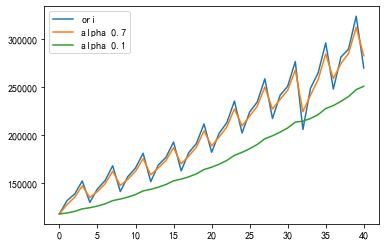

In [106]:
#TODO
import copy

plt.plot(df.iloc[:,2], label='ori')
ori = copy.deepcopy(df.iloc[:,2])

alpha = 0.7
ema1 = pd.Series(ori)
for i in range(1, len(ori)):
    ema1[i] = alpha*ema1[i]+(1-alpha)*ema1[i-1]
plt.plot(ema1, label='alpha 0.7')

alpha = 0.1
ema2 = pd.Series(ori)
for i in range(1, len(ori)):
    ema2[i] = alpha*ema2[i]+(1-alpha)*ema2[i-1]
plt.plot(ema2, label='alpha 0.1')

plt.legend()

## 2 附加题（1分）
example.wav中录制了一段鸟鸣声，但背景中存在很大的噪声，希望能编写一段程序去除噪声。这里采用的是librosa库，有关内容可参考其官方文档https://librosa.org/doc/latest/tutorial.html
<br>（1）绘制音频文件example.wav的图像。
<br>（2）去除音频文件中的噪声。（可使用scipy.signal.lfilter）https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
<br>（3）绘制去除噪声后的音频文件图像。

In [141]:
import librosa
import librosa.display
from scipy import signal
from IPython.display import Audio,display

sr = 16000
e_file='example.wav'
y,sr = librosa.load(e_file, mono=True, sr=sr, offset=0, duration=10)

display(Audio(y,rate=sr))

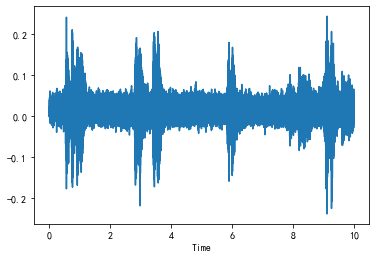

In [142]:
#TODO
# 去噪前
x = np.arange(len(y)) * (10/len(y))
plt.plot(x, y)
plt.xlabel('Time')
plt.show()

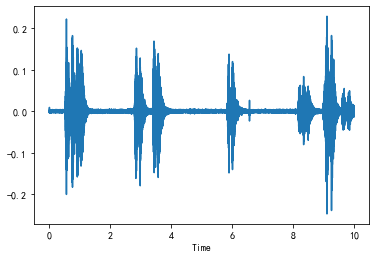

In [154]:
b, a = signal.butter(5, 0.3, 'highpass')
y_filt = signal.filtfilt(b, a, y)
# 去噪后
x_filt = np.arange(len(y_filt)) * (10/len(y_filt))
plt.plot(x_filt, y_filt)
plt.xlabel('Time')
plt.show()

In [155]:
# 保存
import soundfile as sf
sf.write("filtered.wav", y_filt, sr)